In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import random
import scipy
from sympy import *
import torch as tr
import subprocess

/var/folders/w4/l91llmcx3bz5gf_lbcbb2j4h0000gn/T/ipykernel_5950/1853203651.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('sep', axis=1, inplace=True)
/var/folders/w4/l91llmcx3bz5gf_lbcbb2j4h0000gn/T/ipykernel_5950/1853203651.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aux.drop('sep', axis=1, inplace=True)
/var/folders/w4/l91llmcx3bz5gf_lbcbb2j4h0000gn/T/ipykernel_5950/1853203651.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

1 capas, 1 neuronas y error promedio:  0.11194844116525587


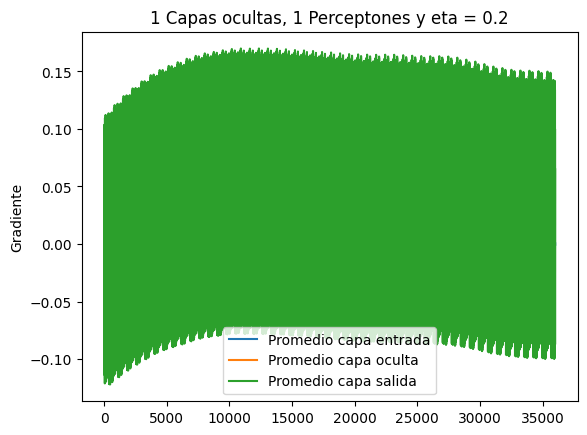

2 capas, 1 neuronas y error promedio:  0.35900274474195903


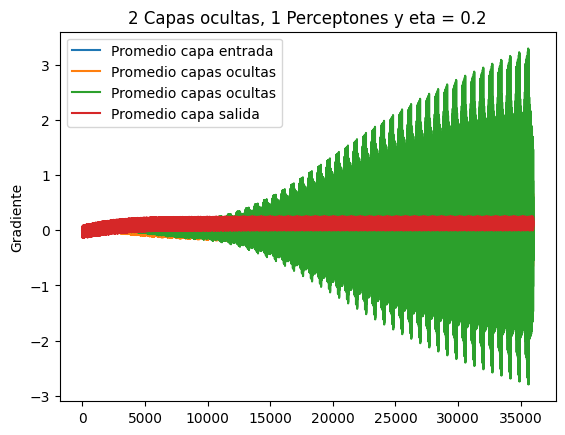

3 capas, 1 neuronas y error promedio:  0.19561409246582792


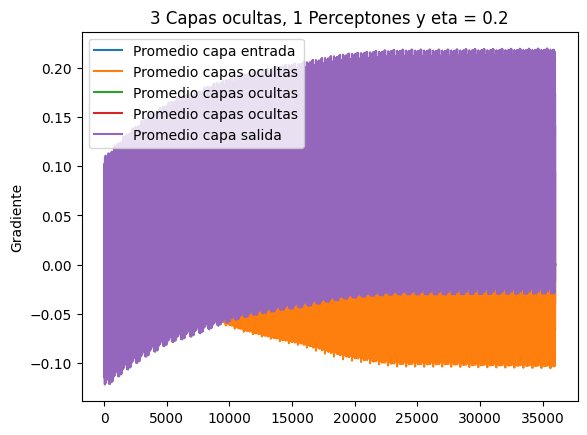

4 capas, 1 neuronas y error promedio:  0.04873576091049178


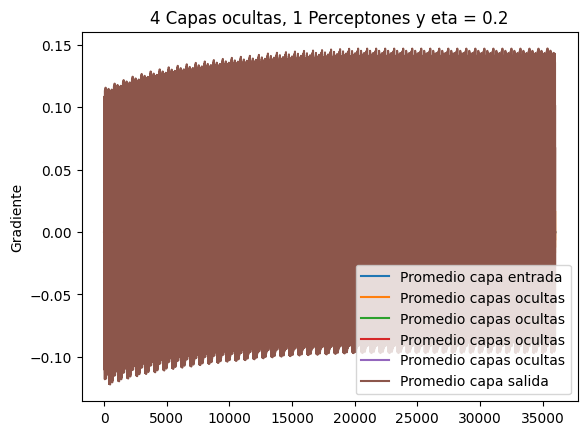

5 capas, 1 neuronas y error promedio:  0.10618084901021634


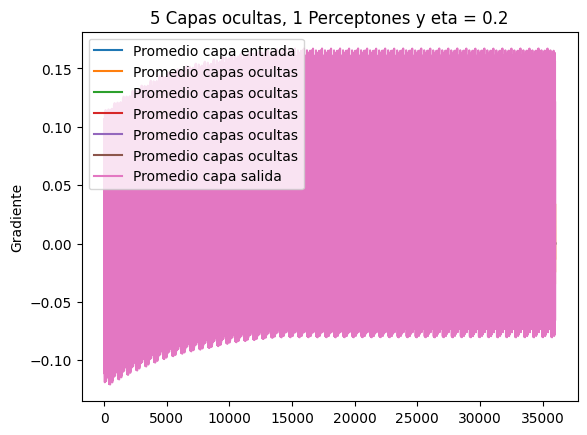

1 capas, 2 neuronas y error promedio:  0.36125699375568004


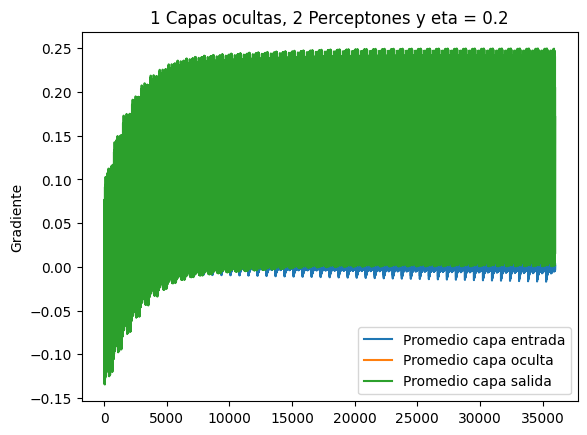

2 capas, 2 neuronas y error promedio:  0.11000615924648689


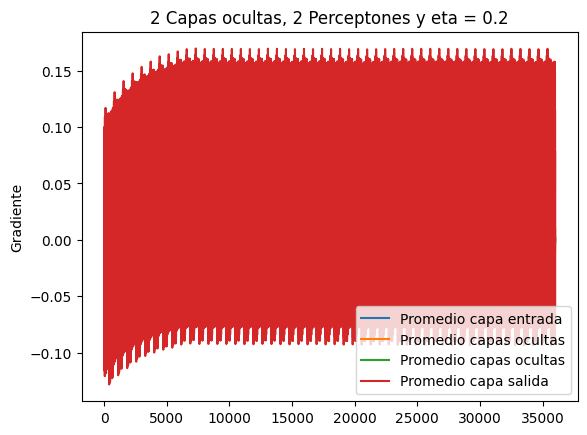

3 capas, 2 neuronas y error promedio:  0.38267595895625806


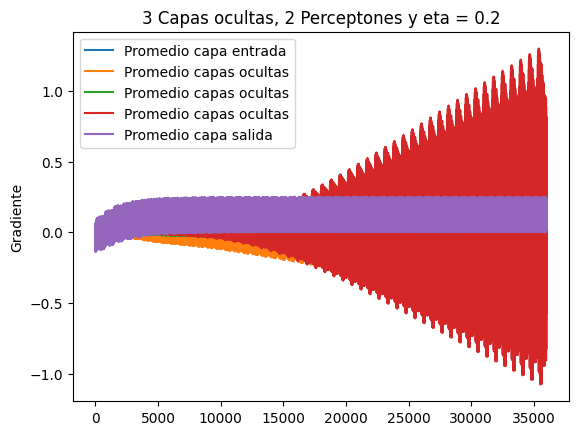

4 capas, 2 neuronas y error promedio:  0.114988415732156


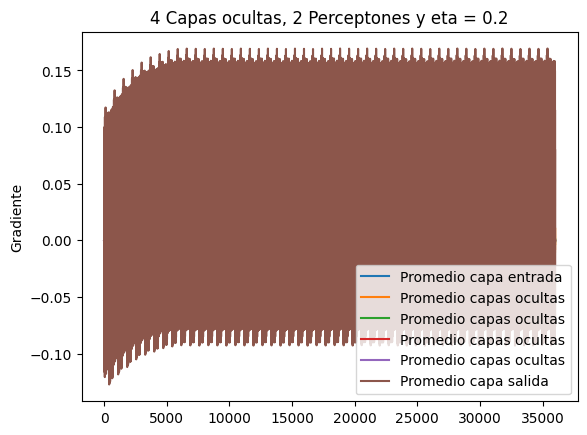

5 capas, 2 neuronas y error promedio:  0.2623424987512434


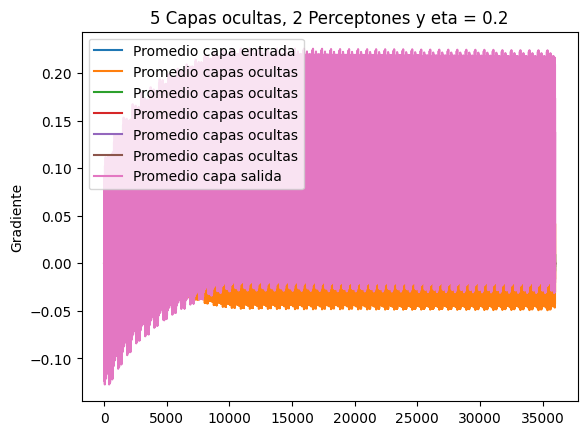

1 capas, 3 neuronas y error promedio:  0.361787948542907


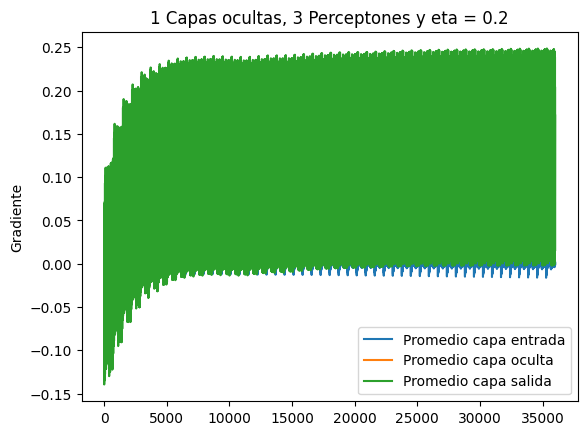

2 capas, 3 neuronas y error promedio:  0.3563305466166925


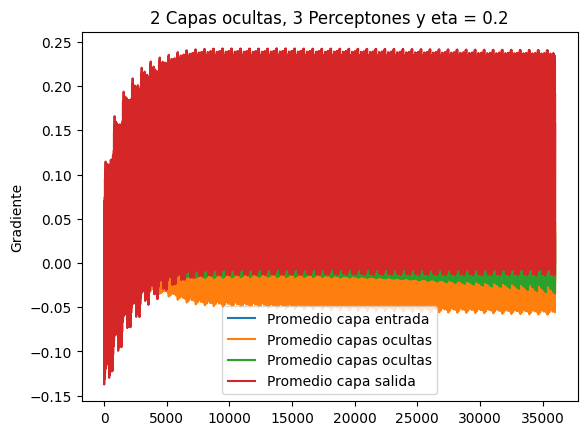

3 capas, 3 neuronas y error promedio:  0.3886753139075344


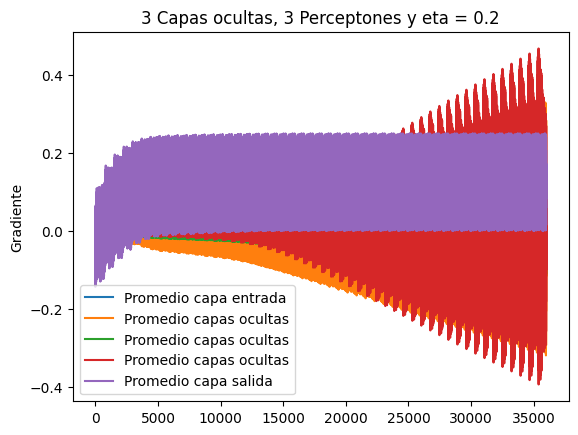

4 capas, 3 neuronas y error promedio:  0.13228365932717143


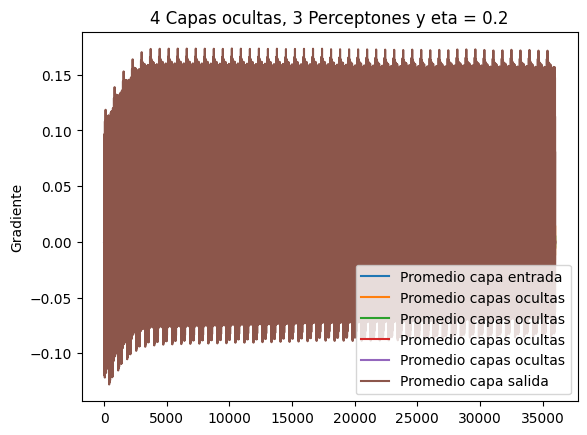

5 capas, 3 neuronas y error promedio:  0.3151177506595248


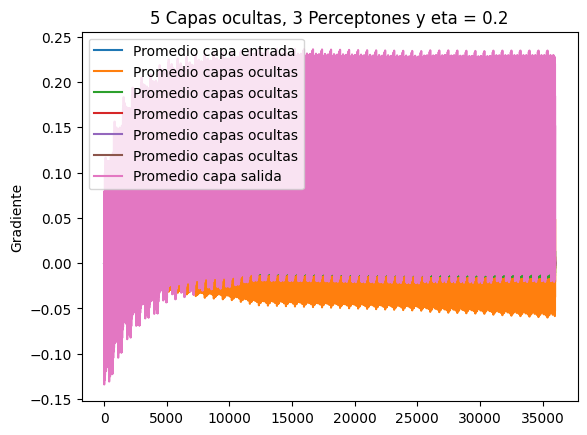

1 capas, 1 neuronas y error promedio:  0.2785987963256504


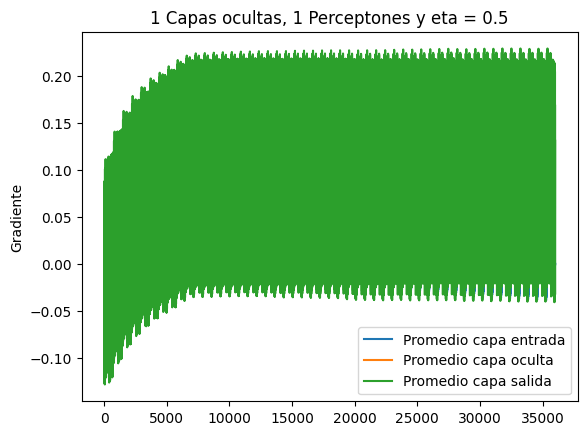

2 capas, 1 neuronas y error promedio:  0.26911178846298195


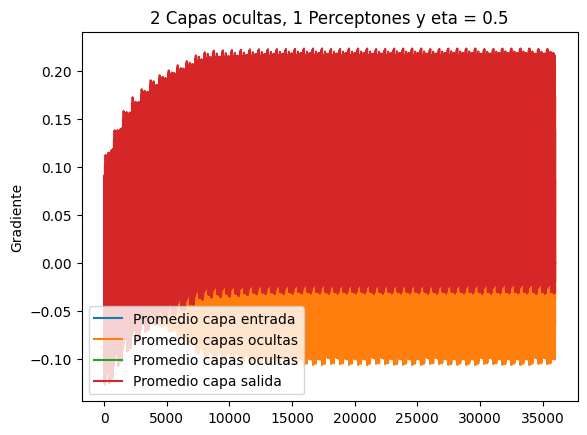

3 capas, 1 neuronas y error promedio:  0.24317688195731485


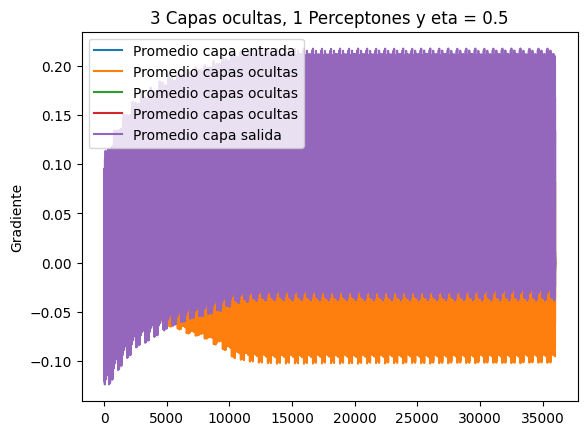

4 capas, 1 neuronas y error promedio:  0.3174200962499475


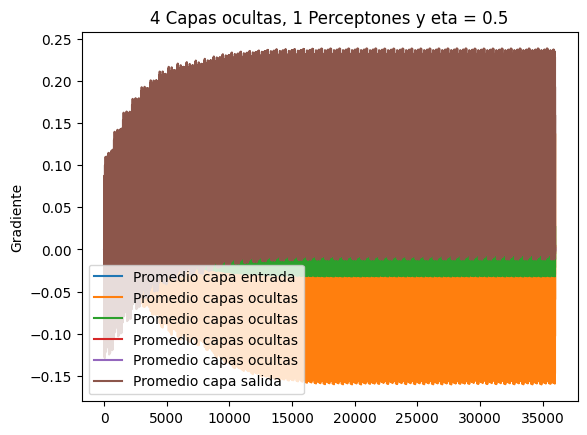

5 capas, 1 neuronas y error promedio:  0.12094088355953649


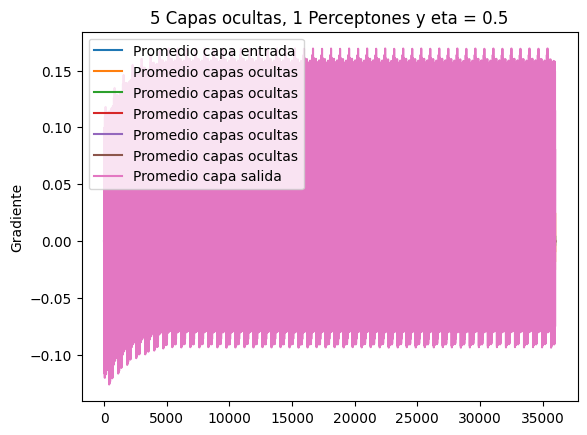

1 capas, 2 neuronas y error promedio:  0.02073079008531342


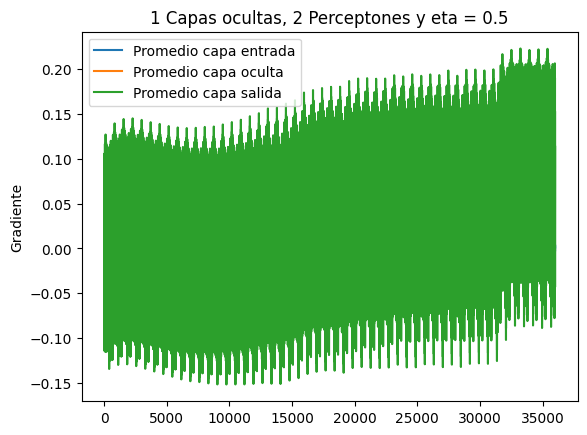

2 capas, 2 neuronas y error promedio:  0.262838756570181


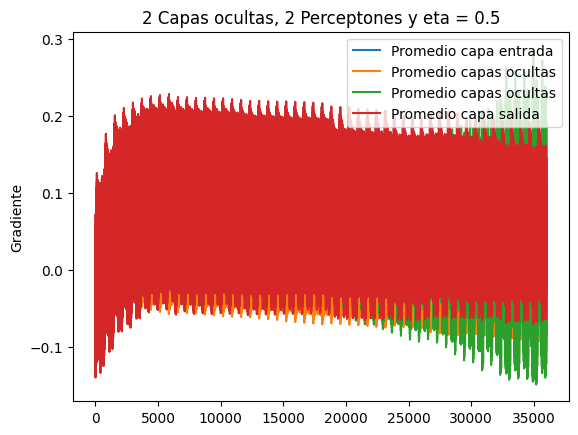

3 capas, 2 neuronas y error promedio:  0.03453052593072916


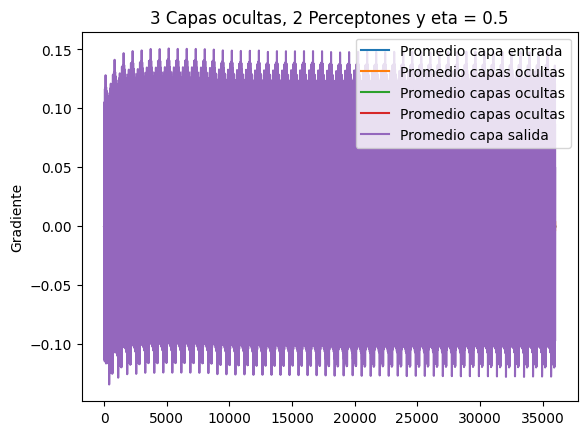

4 capas, 2 neuronas y error promedio:  0.3586092035026091


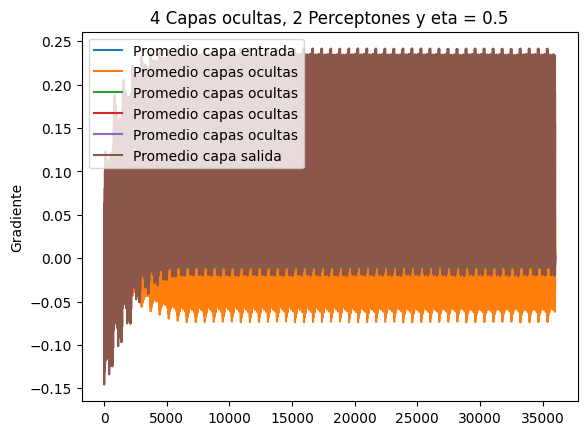

5 capas, 2 neuronas y error promedio:  0.09255871598180024


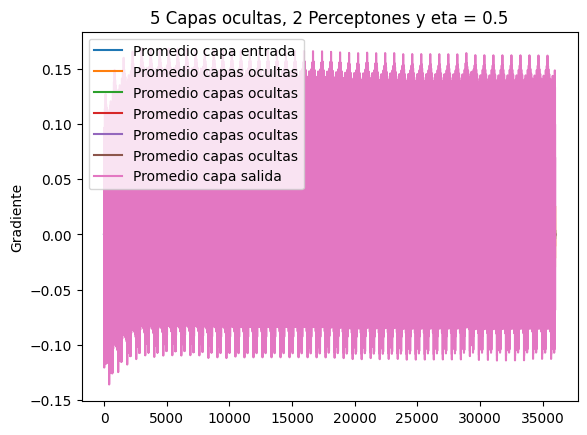

1 capas, 3 neuronas y error promedio:  0.18509375769014214


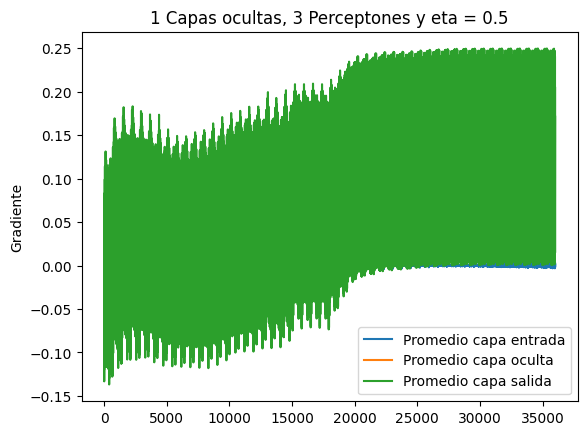

2 capas, 3 neuronas y error promedio:  0.17011159775163884


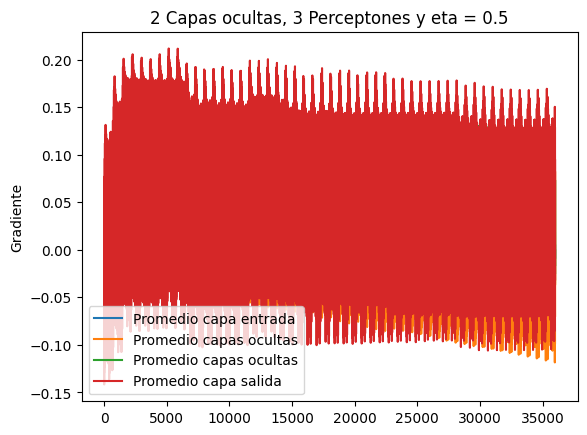

3 capas, 3 neuronas y error promedio:  0.17499110144409102


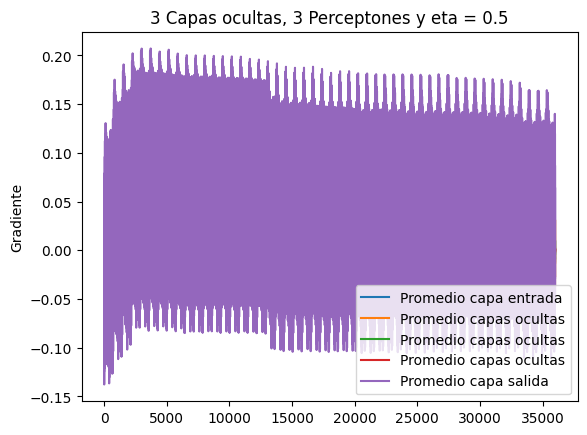

4 capas, 3 neuronas y error promedio:  0.1340175272629782


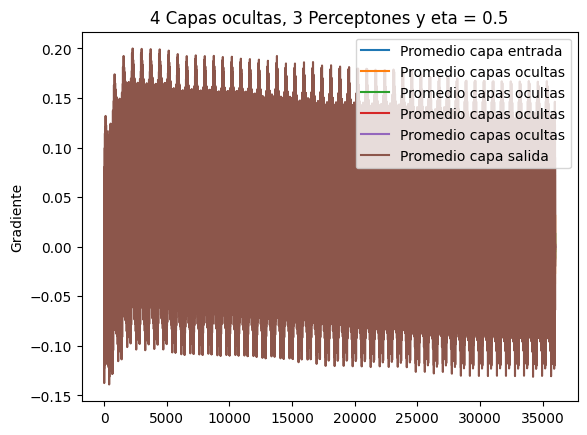

5 capas, 3 neuronas y error promedio:  0.28700459798071537


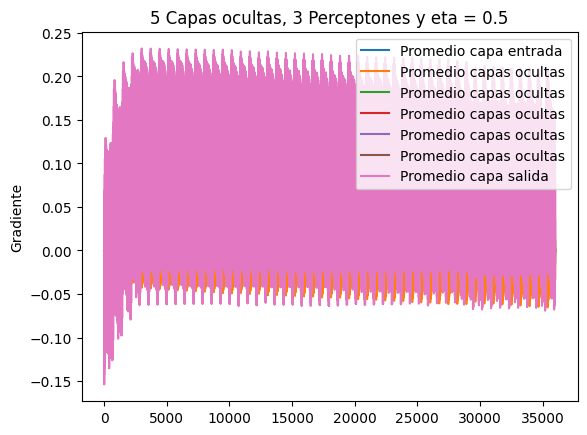

1 capas, 1 neuronas y error promedio:  0.0443342522794882


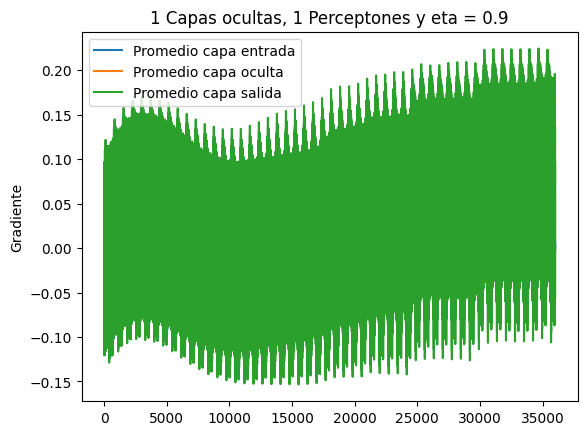

2 capas, 1 neuronas y error promedio:  0.1270045517774353


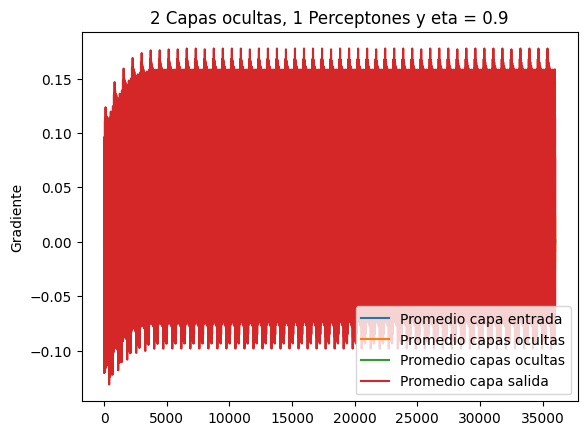

3 capas, 1 neuronas y error promedio:  0.2228394765680606


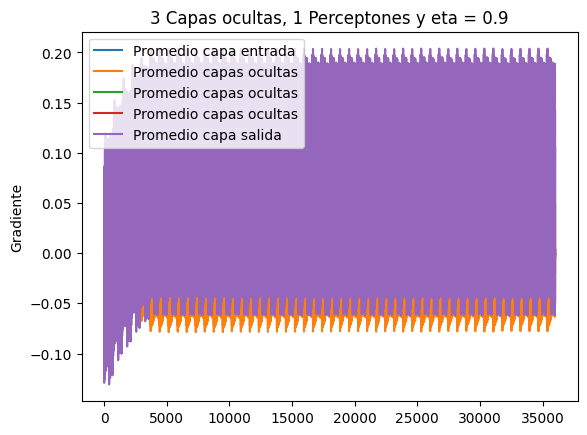

4 capas, 1 neuronas y error promedio:  0.12550728457776333


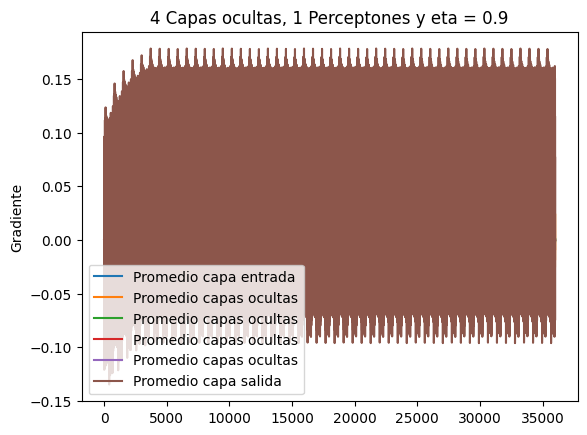

5 capas, 1 neuronas y error promedio:  0.021262812787734658


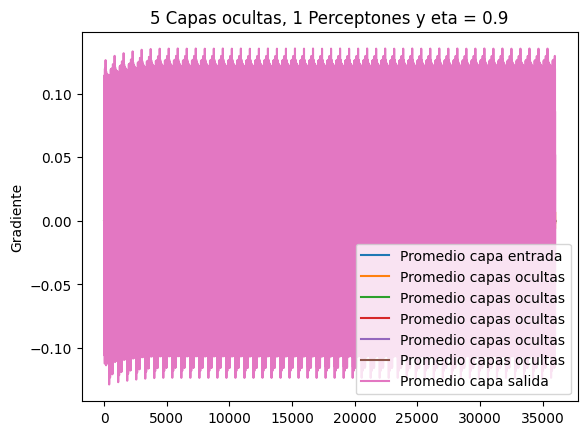

1 capas, 2 neuronas y error promedio:  0.27853196857126505


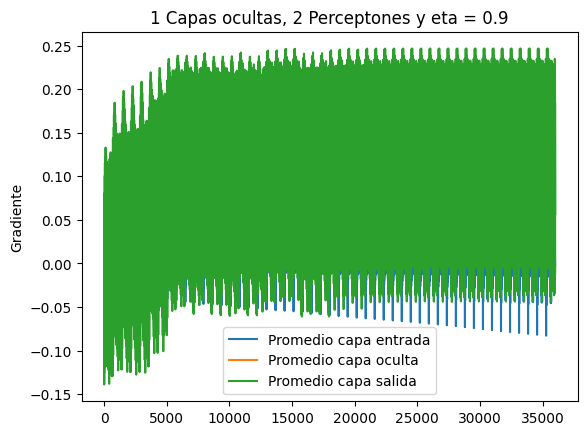

2 capas, 2 neuronas y error promedio:  0.13070564390307982


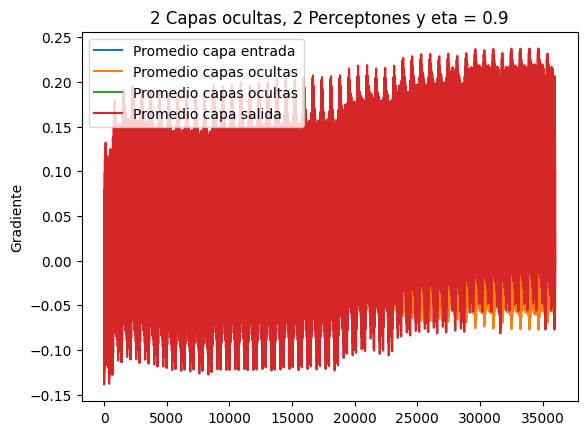

3 capas, 2 neuronas y error promedio:  0.1128329476269572


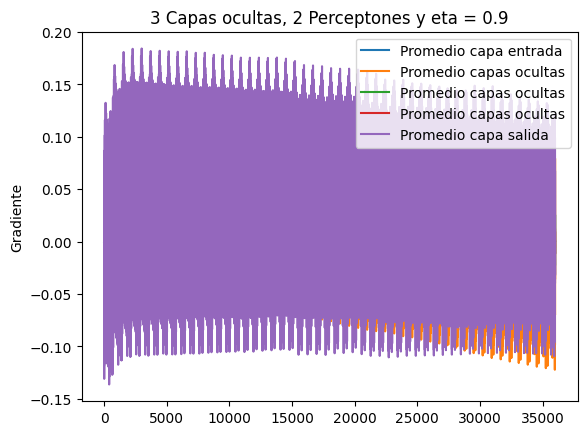

4 capas, 2 neuronas y error promedio:  0.08421947098457373


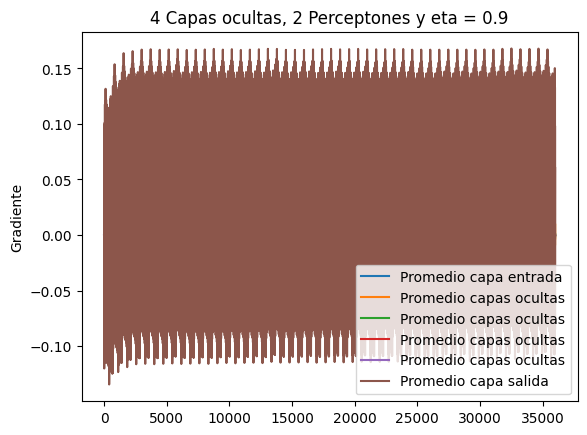

5 capas, 2 neuronas y error promedio:  0.19444401955536603


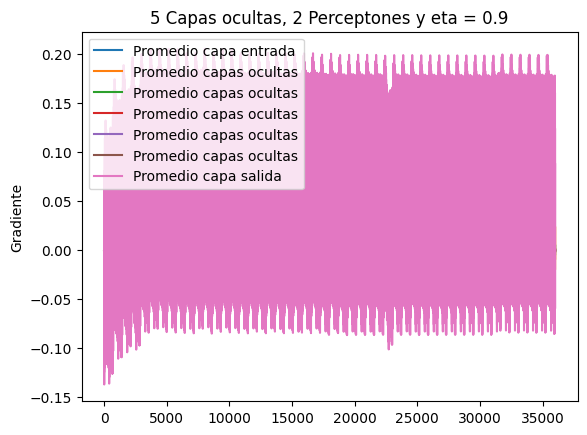

1 capas, 3 neuronas y error promedio:  0.21284028012958814


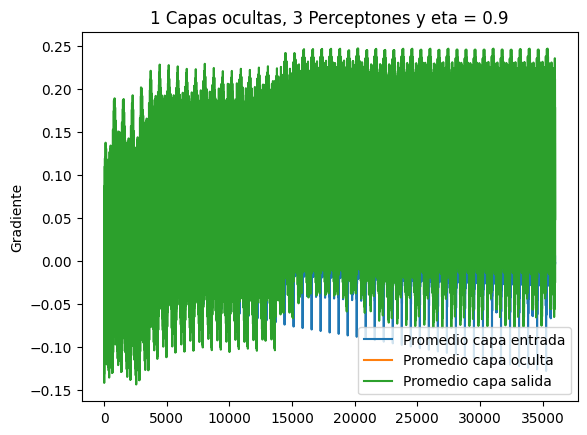

2 capas, 3 neuronas y error promedio:  0.2833139820699175


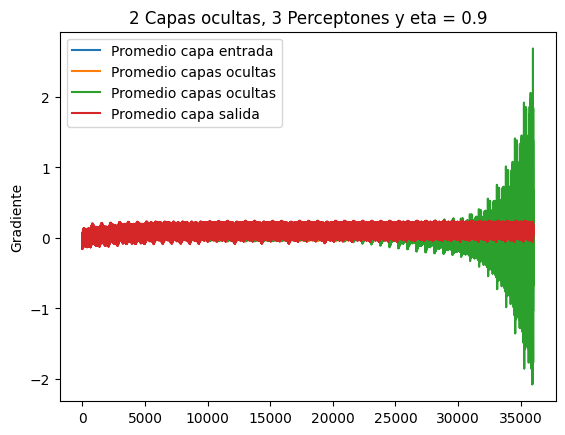

3 capas, 3 neuronas y error promedio:  0.13784938149006704


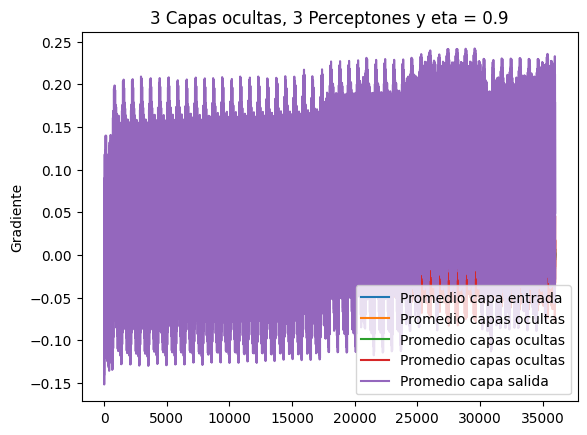

4 capas, 3 neuronas y error promedio:  0.09310225019270847


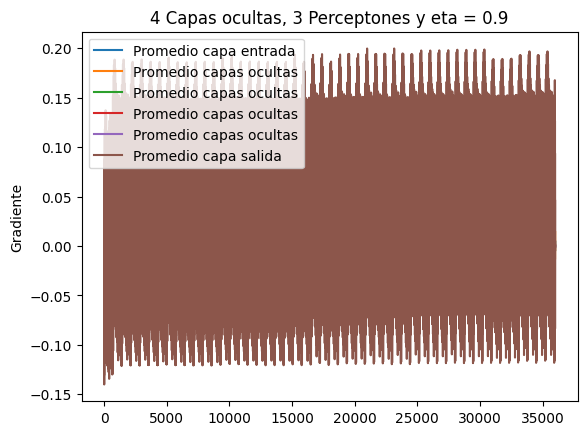

5 capas, 3 neuronas y error promedio:  0.020954303523342065


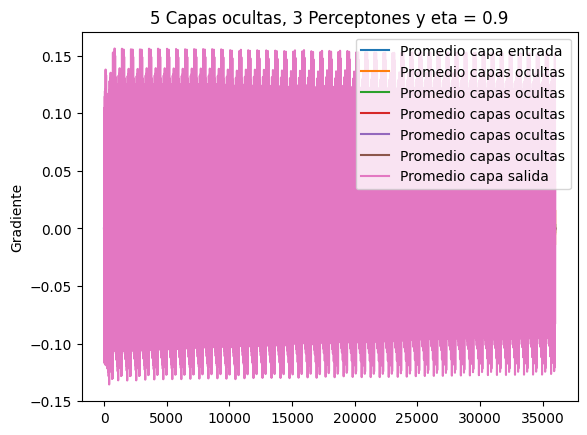

In [60]:
def sig(aux):
    return 1/(1 + np.exp(-aux))

def sig_der(aux):
    return np.exp(-aux)/((1+np.exp(-aux))**2)

def tanh(aux):
    return (np.exp(aux)-np.exp(-aux))/(np.exp(aux)+np.exp(-aux))

def tanh_der(aux):
    return 1 - ((np.exp(aux)-np.exp(-aux))/(np.exp(aux)+np.exp(-aux)))**2

def fun_activ(a, b, aux, fun: str):
    if fun == "lin":
        phi = a*aux + b
    elif fun == "sigm":
        phi = sig(a*aux) + b
    elif fun == "tanh":
        phi = tanh(a*aux) + b
    else:
        return print("La funcion no esta considerada")
    return phi

def fun_der(a, b, aux, fun: str):
    if fun == "lin":
        aux[:, 0] = 1
        phi = aux
    elif fun == "sigm":
        phi = sig_der(a*aux) + b
    elif fun == "tanh":
        phi = tanh_der(a*aux) + b
    else:
        return print("La funcion no esta considerada")
    return phi

def tam_ent(s):                         #numero de entradas
    aux = np.array([[None]]*s)
    for i in range(s):
        aux[i] = Symbol(f'x{i+1}')
    return aux

def tam_pes(s, t):                 #numero de perceptones antes, numero de perceptones despues
    return np.empty((t, s), float)

#reemplazar los valores en cada matriz de pesos inicialmente
def rem_pes(arr):                  #arreglo de pesos y arreglo con el valor de los respectivos pesos
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            arr[i][j] = random.random()
    return arr

def rem_ini(arr, aux):
    for i in range(len(arr)):
        arr[i][0] = float(arr[i][0].subs(arr[i][0], aux[i][0]))
    return arr

def percep_mult(n, p, l, m):
    xi = tam_ent(n)
    wi0 = tam_pes(n, p)
    w_aux = []
    for i in range(l):
        w_aux.append(tam_pes(p, p))
    aux_fin = np.transpose(tam_pes(p, m))
    return xi, wi0, w_aux, aux_fin

#
def eva_yk(wi0, wji, wkj, xi, a, b):
    yi = fun_activ(a, b, (wi0 @ xi), 'tanh')
    yj = []
    for i in range(l):
        yj.append(fun_activ(a, b, (wji[i] @ yi), 'sigm'))
    return yi, yj, fun_activ(a, b, (np.transpose(wkj) @ yj[l-1]), 'sigm')


#------------Lectura y preparacion de base de datos----------------------------------------

mat = scipy.io.loadmat("datos.mat")           #Lectura
arr = np.concatenate((mat['COD1'], mat['Xv1'], mat['t']), axis = 1)    #Concatenar columnas
df = pd.DataFrame(arr)                        #Pasamos a dataframe para operar
df = (df- df.min())/(df.max()-df.min())       #Normalizamos los datos entre [0, 1]
df = df.drop([0])                             #Eliminamos la primera fila que no hace para del set de datos

#df_shuffled = df
df_shuffled = df.sample(frac=1).reset_index(drop=True)        #Revolvemos el set de datos para poder tomar valores aletorios

p_train = 0.60                                # Porcentaje de train.
p_test = 0.50                                 # Porcentaje de testeo

df_shuffled['sep'] = np.random.uniform(0, 1, len(df_shuffled)) <= p_train
df_train, df_aux = df_shuffled[df_shuffled['sep']==True], df_shuffled[df_shuffled['sep']==False]
df_train.drop('sep', axis=1, inplace=True)
df_aux.drop('sep', axis=1, inplace=True)
df_aux['sep'] = np.random.uniform(0, 1, len(df_aux)) <= p_test
df_test, df_val = df_aux[df_aux['sep']==True], df_aux[df_aux['sep']==False]
df_test.drop('sep', axis=1, inplace=True)
df_val.drop('sep', axis=1, inplace=True)

arr = df_train.drop([2], axis=1)
y_def = df_train.loc[:, 2]
arr = arr.to_numpy().tolist()
y_def = y_def.to_numpy().tolist()

eta_aux = [0.2, 0.5, 0.9]

epc = 50                                #Numero de epocas

#--------------------------------Modelo----------------------------------------

for et in eta_aux:
    for k in range(1, 4):              #Cambiar el numero de perceptones
        for t in range(1, 6):          #Cambiar el numero de neuronas ocultas
            n = 2    #Numero de entradas
            p = k    #Numero de perceptones
            l = t    #Numero de capas ocultas
            m = 1    #Salida
            a = 1
            b = 0
            eta = et
            x_i = arr
            yd = y_def
            yd_aux = []
            grad_i = []
            grad_j = []
            grad_aux = []
            grad_k = []
            y_hist = []
            err_aux = []
            err_total = []
            ener = []
            x_aux, wi0, wji, wkj = percep_mult(n, p, l, m)
            wi0 = rem_pes(wi0)
            wji = rem_pes(wji)
            wkj = rem_pes(wkj)

            for j in range(epc):              #Numero de veces que se le pasaran los datos
                yd_aux = np.concatenate((yd_aux, yd))
                for i in range(len(x_i)):
                    xi = np.transpose([x_i[i]])
                    yi, yj, yk = eva_yk(wi0, wji, wkj, xi, a, b)
                    err = yd[i] - yk[0]

                    if abs(err) <= 0.02:
                        y_hist.append(yk[[0]])
                        err_aux.append(err)
                        ener.append(err**2/2)
                        grad_k.append(err*fun_der(a, b, yk, 'sigm'))
                        grad_j_aux = []
                        if l == 1:
                            grad_aux = fun_der(a, b, yj[l-1], 'sigm')*wkj@grad_k[i]
                            grad_j.append(grad_aux)
                        else:
                            grad_aux = fun_der(a, b, yj[l-1], 'sigm')*wkj@grad_k[i]
                            grad_j_aux.append(grad_aux)
                            for j in range(1,l-1):
                                grad_aux = fun_der(a, b, yj[l-j], 'sigm')*wji[l-j-1]@grad_j_aux[j-1]
                                grad_j_aux.append(grad_aux)
                            grad_aux = fun_der(a, b, yj[0], 'sigm')*wji[0]@grad_j_aux[l-2]
                            grad_j_aux.append(grad_aux)
                            grad_j.append(grad_j_aux)
                
                        if l == 1:
                            grad_i.append(fun_der(a, b, yi, 'tanh')*wji[0]@grad_j[i])
                        else:
                            grad_i.append(fun_der(a, b, yi, 'tanh')*wji[0]@grad_j[i][l-1])
                        
                        continue

                    y_hist.append(yk[[0]])
                    err_aux.append(err)
                    ener.append(err**2/2)
                    grad_k.append(err*fun_der(a, b, yk, 'sigm'))
                    wkj = wkj + eta*(np.transpose(grad_k[i]@np.transpose(yj[l-1])))
                    grad_j_aux = []
                    if l == 1:
                        grad_aux = fun_der(a, b, yj[l-1], 'sigm')*wkj@grad_k[i]
                        grad_j.append(grad_aux)
                        wji[0] = wji[0] + eta*(grad_j[i]@np.transpose(yi))
                    else:
                        grad_aux = fun_der(a, b, yj[l-1], 'sigm')*wkj@grad_k[i]
                        grad_j_aux.append(grad_aux)
                        wji[0] = wji[0] + eta*(grad_j_aux[0]@np.transpose(yj[l-1]))
                        for j in range(1,l-1):
                            grad_aux = fun_der(a, b, yj[l-j], 'sigm')*wji[l-j-1]@grad_j_aux[j-1]
                            grad_j_aux.append(grad_aux)
                            wji[0] = wji[0] + eta*(grad_j_aux[j]@np.transpose(yj[l-j-1]))
                        grad_aux = fun_der(a, b, yj[0], 'sigm')*wji[0]@grad_j_aux[l-2]
                        grad_j_aux.append(grad_aux)
                        grad_j.append(grad_j_aux)
                        wji[0] = wji[0] + eta*(grad_j_aux[l-1]@np.transpose(yi))
            
                    if l == 1:
                        grad_i.append(fun_der(a, b, yi, 'tanh')*wji[0]@grad_j[i])
                    else:
                        grad_i.append(fun_der(a, b, yi, 'tanh')*wji[0]@grad_j[i][l-1])
                    wi0 = wi0 + eta*(grad_i[i]@np.transpose(xi))
                err_total.append(np.mean(err_aux))
            print(f"{t} capas, {k} neuronas y error promedio: ", np.mean(err_total))



        #---------------------------------Graficas-------------------------------#
            def graf_yik(arr):
                return np.array([None]*(len(arr)))
            
            yi_list = np.array([None]*(len(grad_i[0])))

            for i in range(len(yi_list)):
                yi_list[i] = graf_yik(grad_i)
            
            for i in range(len(grad_i)):
                for j in range(len(grad_i[i])):
                    yi_list[j][i] = grad_i[i][j]

            tam_i = len(grad_i)
            tam_j = len(grad_j)
            tam_k = len(grad_k)
            tam_s = len(y_hist)
            
            yi_aux = np.array([None]*(tam_i))
            if l == 1:
                yj_aux = np.array([None]*(tam_j))
            else:
                yj_aux = np.array([[None]*len(grad_j[0])]*(tam_j))
            yk_aux = np.array([None]*(tam_k))
            ys_aux = np.array([None]*(tam_s))

            for i in range(tam_i):
                yi_aux[i] = sum(grad_i[i])/len(grad_i[i])
                if l == 1:
                    yk_aux[i] = sum(grad_k[i])/len(grad_k[i])
                else:
                    for j in range(len(grad_j[i])):
                        yj_aux[i][j] = sum(grad_j[i][j])/len(grad_j[i][j])

                yk_aux[i] = sum(grad_k[i])/len(grad_k[i])
                ys_aux[i] = y_hist[i]
            
            x_gradi = np.array(range(1, tam_i+1))

            #plt.xlabel("Iteracion")
            plt.title(f'{l} Capas ocultas, {k} Perceptones y eta = {eta}')
            plt.ylabel("Gradiente")
            plt.plot(x_gradi, yi_aux, label = "Promedio capa entrada")
            if l == 1:
                plt.plot(x_gradi, yj_aux, label = "Promedio capa oculta")
            else:
                plt.plot(x_gradi, yj_aux[:], label = "Promedio capas ocultas")
            plt.plot(x_gradi, yk_aux, label = "Promedio capa salida")
            #------Graficar Salidas
            #plt.ylabel("Valor salidas")
            #plt.plot(x_gradi, yd_aux, label = "Salida Real")
            #plt.plot(x_gradi, ys_aux, label = "Salida Calculada")
            #------Graficar Error
            #plt.ylabel("Nivel de Energía")
            #plt.plot(x_gradi, ener, label = "Energía")
            plt.legend()
            plt.show()